# Building your Recurrent Neural Network - Step by Step

We will first implement our first Recurrent Neural Network in numpy.

Recurrent Neural Networks (RNN) are very effective for processing sequential data and other sequence tasks because they have "memory". They can read inputs $x^{\langle t \rangle}$ (such as words) one at a time, and remember some information/context through the hidden layer activations that get passed from one time-step to the next. This allows a uni-directional RNN to take information from the past to process later inputs. A bidirection RNN can take context from both the past and the future. 

**Notation**:
- Superscript $[l]$ denotes an object associated with the $l^{th}$ layer. 
    - Example: $a^{[4]}$ is the $4^{th}$ layer activation. $W^{[5]}$ and $b^{[5]}$ are the $5^{th}$ layer parameters.

- Superscript $(i)$ denotes an object associated with the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example input.

- Lowerscript $ t $ denotes an object at the $t^{th}$ time-step. 
    - Example: $x_{ t}$ is the input x at the $t^{th}$ time-step. $x^{(i)}_{t}$ is the input at the $t^{th}$ timestep of example $i$.
    
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the activations in layer $l$.
    

Let's get started!

Let's first import all the packages

In [2]:
import numpy as np
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 0)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## 1 - Forward propagation for the basic Recurrent Neural Network

The basic RNN that you will implement has the structure below. In this example, $T_x = T_y$. 

![alt text](https://github.com/PhilippSchlieper/Images/blob/master/rnn_new_01.png?raw=true)
<caption><center> **Figure 1**: Basic RNN model </center></caption>

Here's how to implement an RNN: 

**Steps**:
1. Implement the calculations needed for one time-step of the RNN.
2. Implement a loop over $T_x$ time-steps in order to process all the inputs, one at a time. 

Let's go!

## 1.1 - RNN cell

A Recurrent neural network can be seen as the repetition of a single cell. First we are going to implement the computations for a single time-step. The following figure describes the operations for a single time-step of an RNN cell. 

![alt text](https://github.com/PhilippSchlieper/Images/blob/master/rnn_new_02.png?raw=true)
<caption><center> **Figure 2**: Basic RNN cell. Takes as input $x_{t}$ (current input) and $h_{t - 1}$ (previous hidden state containing information from the past), and outputs $h_{t}$ which is given to the next RNN cell and also used to predict $y_{t}$ </center></caption>

**Exercise**: Implement the RNN-cell described in Figure (2).

**Instructions**:
1. Compute the hidden state with tanh activation: $h_{t} = \tanh(W_{hh} h_{t-1} + W_{hx} x_{t} + b_h)$.
2. Using your new hidden state $h_{t}$, compute the prediction ${y}_{t} = softmax(W_{yh} h_{t} + b_y)$. We provided you a function: `softmax`.
3. Store $(h_{t}, h_{t-1}, x_{t}, parameters)$ in cache
4. Return $h_{t}$ , $y_{t}$ and cache

We will vectorize over $m$ examples. Thus, $x_{t}$ will have dimension $(n_x,m)$, and $h_{t}$ will have dimension $(n_h,m)$. 

In [3]:
#FUNCTION: rnn_cell_forward

def rnn_cell_forward(xt, h_prev, parameters):
    """
    Implements a single forward step of the RNN-cell as described in Figure (2)

    Arguments:
    xt -- your input data at timestep "t", numpy array of shape (n_x, m).
    h_prev -- Hidden state at timestep "t-1", numpy array of shape (n_h, m)
    parameters -- python dictionary containing:
                        Whx -- Weight matrix multiplying the input, numpy array of shape (n_h, n_x)
                        Whh -- Weight matrix multiplying the hidden state, numpy array of shape (n_h, n_h)
                        Wyh -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_h)
                        bh --  Bias, numpy array of shape (n_h, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
    Returns:
    h_next -- next hidden state, of shape (n_h, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple of values needed for the backward pass, contains (h_next, h_prev, xt, parameters)
    """
    
    # Retrieve parameters from "parameters"
    Whx = parameters["Whx"]
    Whh = parameters["Whh"]
    Wyh = parameters["Wyh"]
    bh = parameters["bh"]
    by = parameters["by"]
    
    ### START CODE HERE ### (≈2 lines)
    # compute next activation state using the formula given above
    h_next = np.tanh(np.dot(Whh, h_prev) + np.dot(Whx, xt) + bh)
    # compute output of the current cell using the formula given above
    yt_pred = softmax(np.dot(Wyh, h_next) + by)
    ### END CODE HERE ###
    
    # store values you need for backward propagation in cache
    cache = (h_next, h_prev, xt, parameters)
    
    return h_next, yt_pred, cache

In [4]:
np.random.seed(1)
xt = np.random.randn(3,10)
h_prev = np.random.randn(5,10)
Whh = np.random.randn(5,5)
Whx = np.random.randn(5,3)
Wyh = np.random.randn(2,5)
bh = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"Whh": Whh, "Whx": Whx, "Wyh": Wyh, "bh": bh, "by": by}

h_next, yt_pred, cache = rnn_cell_forward(xt, h_prev, parameters)
print("h_next[4] = ", h_next[4])
print("h_next.shape = ", h_next.shape)
print("yt_pred[1] =", yt_pred[1])
print("yt_pred.shape = ", yt_pred.shape)

h_next[4] =  [ 0.59584544  0.18141802  0.61311866  0.99808218  0.85016201  0.99980978
 -0.18887155  0.99815551  0.6531151   0.82872037]
h_next.shape =  (5, 10)
yt_pred[1] = [0.9888161  0.01682021 0.21140899 0.36817467 0.98988387 0.88945212
 0.36920224 0.9966312  0.9982559  0.17746526]
yt_pred.shape =  (2, 10)


## 1.2 - RNN forward pass 

An RNN as the repetition of the cell we have just built. If our input sequence of data is carried over 10 time steps, then we will copy the RNN cell 10 times. Each cell takes as input the hidden state from the previous cell ($h_{t-1}$) and the current time-step's input data ($x_{t}$). It outputs a hidden state ($h_{t}$) and a prediction ($y_{t}$) for this time-step.


![alt text](https://github.com/PhilippSchlieper/Images/blob/master/rnn_new_03.png?raw=true)
<caption><center> **Figure 3**: Basic RNN. The input sequence $x = (x_{1}, x_{2}, ..., x_{T_x})$  is carried over $T_x$ time steps. The network outputs $y = (y_{1}, y_{2}, ..., y_{T_x})$. </center></caption>



**Exercise**: Code the forward propagation of the RNN described in Figure (3).

**Instructions**:
1. Create a vector of zeros ($h$) that will store all the hidden states computed by the RNN.
2. Initialize the "next" hidden state as $h_0$ (initial hidden state).
3. Start looping over each time step, your incremental index is $t$ :
    - Update the "next" hidden state and the cache by running `rnn_cell_forward`
    - Store the "next" hidden state in $h$ ($t^{th}$ position) 
    - Store the prediction in y
    - Add the cache to the list of caches
4. Return $h$, $y$ and caches

In [5]:
#FUNCTION: rnn_forward

def rnn_forward(x, h0, parameters):
    """
    Implement the forward propagation of the recurrent neural network described in Figure (3).

    Arguments:
    x -- Input data for every time-step, of shape (n_x, m, T_x).
    h0 -- Initial hidden state, of shape (n_h, m)
    parameters -- python dictionary containing:
                        Whh -- Weight matrix multiplying the hidden state, numpy array of shape (n_h, n_h)
                        Whx -- Weight matrix multiplying the input, numpy array of shape (n_h, n_x)
                        Wyh -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_h)
                        bh --  Bias numpy array of shape (n_h, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)

    Returns:
    h -- Hidden states for every time-step, numpy array of shape (n_h, m, T_x)
    y_pred -- Predictions for every time-step, numpy array of shape (n_y, m, T_x)
    caches -- tuple of values needed for the backward pass, contains (list of caches, x)
    """
    
    # Initialize "caches" which will contain the list of all caches
    caches = []
    
    # Retrieve dimensions from shapes of x and parameters["Wyh"]
    n_x, m, T_x = x.shape
    n_y, n_h = parameters["Wyh"].shape
    
    ### START CODE HERE ###
    
    # initialize "h" and "y" with zeros (≈2 lines)
    h = np.zeros((n_h, m, T_x))
    y_pred = np.zeros((n_y, m, T_x))

    # Initialize a_next (≈1 line)
    h_next = h0

    # loop over all time-steps
    for t in range(T_x):
        # Update next hidden state, compute the prediction, get the cache (≈1 line)
        h_next, yt_pred, cache = rnn_cell_forward(x[:,:,t], h_next, parameters)
        # Save the value of the new "next" hidden state in a (≈1 line)
        h[:,:,t] = h_next
        # Save the value of the prediction in y (≈1 line)
        y_pred[:,:,t] = yt_pred
        # Append "cache" to "caches" (≈1 line)
        caches.append(cache)
        
    ### END CODE HERE ###
    
    # store values needed for backward propagation in cache
    caches = (caches, x)
    
    return h, y_pred, caches

In [6]:
np.random.seed(1)
x = np.random.randn(3,10,4)
h0 = np.random.randn(5,10)
Whh = np.random.randn(5,5)
Whx = np.random.randn(5,3)
Wyh = np.random.randn(2,5)
bh = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"Whh": Whh, "Whx": Whx, "Wyh": Wyh, "bh": bh, "by": by}

h, y_pred, caches = rnn_forward(x, h0, parameters)
print("h[4][1] = ", h[4][1])
print("h.shape = ", h.shape)
print("y_pred[1][3] =", y_pred[1][3])
print("y_pred.shape = ", y_pred.shape)
print("caches[1][1][3] =", caches[1][1][3])
print("len(caches) = ", len(caches))

h[4][1] =  [-0.99999375  0.77911235 -0.99861469 -0.99833267]
h.shape =  (5, 10, 4)
y_pred[1][3] = [0.79560373 0.86224861 0.11118257 0.81515947]
y_pred.shape =  (2, 10, 4)
caches[1][1][3] = [-1.1425182  -0.34934272 -0.20889423  0.58662319]
len(caches) =  2


Congratulations! We've successfully built the forward propagation of a recurrent neural network from scratch. This will work well enough for some applications, but it suffers from vanishing gradient problems. So it works best when each output $y_{t}$ can be estimated using mainly "local" context (meaning information from inputs $x_{t'}$ where $t'$ is not too far from $t$). 

In the next part, we will build a more complex LSTM model, which is better at addressing vanishing gradients. The LSTM will be better able to remember a piece of information and keep it saved for many timesteps. 

### Congratulations !




## 3 - Backpropagation in recurrent neural networks 

In modern deep learning frameworks, you only have to implement the forward pass, and the framework takes care of the backward pass, so most deep learning engineers do not need to bother with the details of the backward pass. If however you are an expert in calculus and want to see the details of backprop in RNNs.

In recurrent neural networks we can to calculate the derivatives with respect to the cost in order to update the parameters. The backprop equations are quite complicated and we did not derive them here. However, we will briefly present them below. 

### 3.1 - Basic RNN  backward pass

We will start by computing the backward pass for the basic RNN-cell.

![alt text](https://github.com/PhilippSchlieper/Images/blob/master/rn_new_08.png?raw=true) <br>
<caption><center> **Figure 5**: RNN-cell's backward pass. Just like in a fully-connected neural network, the derivative of the cost function $J$ backpropagates through the RNN by following the chain-rule from calculas. The chain-rule is also used to calculate $(\nabla W_{hx},\nabla W_{hh},\nabla b_h)$ to update the parameters $(W_{hx}, W_{hh}, b_h)$. </center></caption>

#### Deriving the one step backward functions: 

To compute the `rnn_cell_backward` you need to compute the following equations. It is a good exercise to derive them by hand. 

The derivative of $\tanh$ is $1-\tanh(x)^2$. You can find the complete proof [here](https://www.wyzant.com/resources/lessons/math/calculus/derivative_proofs/tanx). Note that: $ \text{sech}(x)^2 = 1 - \tanh(x)^2$

Similarly for $(\nabla W_{xh},\nabla W_{hh},\nabla b_h)$ , the derivative of  $\tanh(u)$ is $(1-\tanh(u)^2)du$. 

The final two equations also follow same rule and are derived using the $\tanh$ derivative. Note that the arrangement is done in a way to get the same dimensions to match.

In [7]:
def rnn_cell_backward(dh_next, cache):
    """
    Implements the backward pass for the RNN-cell (single time-step).

    Arguments:
    da_next -- Gradient of loss with respect to next hidden state
    cache -- python dictionary containing useful values (output of rnn_cell_forward())

    Returns:
    gradients -- python dictionary containing:
                        dx -- Gradients of input data, of shape (n_x, m)
                        dh_prev -- Gradients of previous hidden state, of shape (n_h, m)
                        dWhx -- Gradients of input-to-hidden weights, of shape (n_h, n_x)
                        dWhh -- Gradients of hidden-to-hidden weights, of shape (n_h, n_h)
                        dbh -- Gradients of bias vector, of shape (n_h, 1)
    """
    
    # Retrieve values from cache
    (h_next, h_prev, xt, parameters) = cache
    
    # Retrieve values from parameters
    Whx = parameters["Whx"]
    Whh = parameters["Whh"]
    Wyh = parameters["Wyh"]
    bh = parameters["bh"]
    by = parameters["by"]

    ### START CODE HERE ###
    # compute the gradient of tanh with respect to h_next (≈1 line)
    dtanh = 1 - np.square(np.tanh(np.dot(Whx, xt) + np.dot(Whh, h_prev) + bh))

    # compute gradient of the loss with respect to Wxh (≈2 lines)
    dxt = np.dot(Whx.T, dtanh)
    dWhx = np.dot(dtanh, xt.T)

    # compute the gradient with respect to Whh (≈2 lines)
    dh_prev = np.dot(Whh.T, dtanh)
    dWhh = np.dot(dtanh, h_prev.T)

    # compute the gradient with respect to b (≈1 line)
    dbh = np.sum(dtanh, axis=1, keepdims=True)

    ### END CODE HERE ###
    
    # Store the gradients in a python dictionary
    gradients = {"dxt": dxt, "dh_prev": dh_prev, "dWhx": dWhx, "dWhh": dWhh, "dbh": dbh}
    
    return gradients

In [8]:
np.random.seed(1)
xt = np.random.randn(3,10)
h_prev = np.random.randn(5,10)
Whx = np.random.randn(5,3)
Whh = np.random.randn(5,5)
Wyh = np.random.randn(2,5)
bh = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"Whx": Whx, "Whh": Whh, "Wyh": Wyh, "bh": bh, "by": by}

h_next, yt, cache = rnn_cell_forward(xt, h_prev, parameters)

dh_next = np.random.randn(5,10)
gradients = rnn_cell_backward(dh_next, cache)
print("gradients[\"dxt\"][1][2] =", gradients["dxt"][1][2])
print("gradients[\"dxt\"].shape =", gradients["dxt"].shape)
print("gradients[\"dh_prev\"][2][3] =", gradients["dh_prev"][2][3])
print("gradients[\"dh_prev\"].shape =", gradients["dh_prev"].shape)
print("gradients[\"dWhx\"][3][1] =", gradients["dWhx"][3][1])
print("gradients[\"dWhx\"].shape =", gradients["dWhx"].shape)
print("gradients[\"dWhh\"][1][2] =", gradients["dWhh"][1][2])
print("gradients[\"dWhh\"].shape =", gradients["dWhh"].shape)
print("gradients[\"dbh\"][4] =", gradients["dbh"][4])
print("gradients[\"dbh\"].shape =", gradients["dbh"].shape)

gradients["dxt"][1][2] = 0.6710102050036744
gradients["dxt"].shape = (3, 10)
gradients["dh_prev"][2][3] = 0.39325574082122644
gradients["dh_prev"].shape = (5, 10)
gradients["dWhx"][3][1] = -0.50162481276433
gradients["dWhx"].shape = (5, 3)
gradients["dWhh"][1][2] = 0.4083034820480881
gradients["dWhh"].shape = (5, 5)
gradients["dbh"][4] = [2.32288592]
gradients["dbh"].shape = (5, 1)


#### Backward pass through the RNN

Computing the gradients of the cost with respect to $h_t$ at every time-step $t$ is useful because it is what helps the gradient backpropagate to the previous RNN-cell. To do so, we need to iterate through all the time steps starting at the end, and at each step, you increment the overall $db_h$, $dW_{hh}$, $dW_{hx}$ and you store $dx$.

**Instructions**:

Implement the `rnn_backward` function. Initialize the return variables with zeros first and then loop through all the time steps while calling the `rnn_cell_backward` at each time timestep, update the other variables accordingly.

In [9]:
def rnn_backward(dh, caches):
    """
    Implement the backward pass for a RNN over an entire sequence of input data.

    Arguments:
    dh -- Upstream gradients of all hidden states, of shape (n_h, m, T_x)
    caches -- tuple containing information from the forward pass (rnn_forward)
    
    Returns:
    gradients -- python dictionary containing:
                        dx -- Gradient w.r.t. the input data, numpy-array of shape (n_x, m, T_x)
                        dh0 -- Gradient w.r.t the initial hidden state, numpy-array of shape (n_h, m)
                        dWhx -- Gradient w.r.t the input's weight matrix, numpy-array of shape (n_h, n_x)
                        dWhh -- Gradient w.r.t the hidden state's weight matrix, numpy-arrayof shape (n_h, n_h)
                        dbh -- Gradient w.r.t the bias, of shape (n_h, 1)
    """
        
     ### START CODE HERE ###

    # Retrieve values from the first cache (t=1) of caches (≈2 lines)
    (caches, x) = caches
    (h1, h0, x1, parameters) = caches[0]

    # Retrieve dimensions from dh's and x1's shapes (≈2 lines)
    n_h, m, T_x = dh.shape
    n_x, m = x1.shape

    # initialize the gradients with the right sizes (≈6 lines)
    dx = np.zeros((n_x, m, T_x))
    dWhx = np.zeros((n_h, n_x))
    dWhh = np.zeros((n_h, n_h))
    dbh = np.zeros((n_h, 1))
    dh0 = np.zeros((n_h, m))
    dh_prevt = np.zeros((n_h, m))

    # Loop through all the time steps
    for t in reversed(range(T_x)):
        # Compute gradients at time step t. Choose wisely the "dh_next" and the "cache" to use in the backward propagation step. (≈1 line)
        gradients = rnn_cell_backward(dh[:,:,t], caches[t])
        # Retrieve derivatives from gradients (≈ 1 line)
        dxt, dh_prevt, dWhxt, dWhht, dbht = gradients["dxt"], gradients["dh_prev"], gradients["dWhx"], gradients["dWhh"], gradients["dbh"]
        # Increment global derivatives w.r.t parameters by adding their derivative at time-step t (≈4 lines)
        dx[:, :, t] = dxt
        dWhx += dWhxt
        dWhh += dWhht
        dbh += dbht

    # Set dh0 to the gradient of a which has been backpropagated through all time-steps (≈1 line)
    dh0 = dh_prevt
    ### END CODE HERE ###

    # Store the gradients in a python dictionary
    gradients = {"dx": dx, "dh0": dh0, "dWhx": dWhx, "dWhh": dWhh,"dbh": dbh}
    
    return gradients

In [10]:
np.random.seed(1)
x = np.random.randn(3,10,4)
h0 = np.random.randn(5,10)
Whx = np.random.randn(5,3)
Whh = np.random.randn(5,5)
Wyh = np.random.randn(2,5)
bh = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"Whx": Whx, "Whh": Whh, "Wyh": Wyh, "bh": bh, "by": by}
h, y, caches = rnn_forward(x, h0, parameters)
dh = np.random.randn(5, 10, 4)
gradients = rnn_backward(dh, caches)

print("gradients[\"dx\"][1][2] =", gradients["dx"][1][2])
print("gradients[\"dx\"].shape =", gradients["dx"].shape)
print("gradients[\"dh0\"][2][3] =", gradients["dh0"][2][3])
print("gradients[\"dh0\"].shape =", gradients["dh0"].shape)
print("gradients[\"dWhx\"][3][1] =", gradients["dWhx"][3][1])
print("gradients[\"dWhx\"].shape =", gradients["dWhx"].shape)
print("gradients[\"dWhh\"][1][2] =", gradients["dWhh"][1][2])
print("gradients[\"dWhh\"].shape =", gradients["dWhh"].shape)
print("gradients[\"dbh\"][4] =", gradients["dbh"][4])
print("gradients[\"dbh\"].shape =", gradients["dbh"].shape)

gradients["dx"][1][2] = [-0.74405255 -1.25598063 -0.06961792 -0.02437825]
gradients["dx"].shape = (3, 10, 4)
gradients["dh0"][2][3] = 0.6422325269570328
gradients["dh0"].shape = (5, 10)
gradients["dWhx"][3][1] = 4.519171574179794
gradients["dWhx"].shape = (5, 3)
gradients["dWhh"][1][2] = -0.47934602671667004
gradients["dWhh"].shape = (5, 5)
gradients["dbh"][4] = [3.13285438]
gradients["dbh"].shape = (5, 1)


In [11]:
!pip3 install torch torchvision

In [12]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [13]:
# Hyper Parameters
TIME_STEP = 10      # rnn time step
INPUT_SIZE = 1      # rnn input size
LR = 0.02           # learning rate

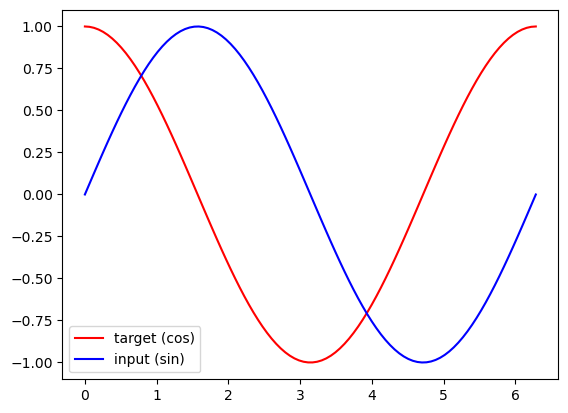

In [14]:
# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)  # float32 for converting torch FloatTensor
x_np = np.sin(steps)
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()

In [15]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # number of rnn layer
            batch_first=True,   # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)

        outs = []    # save all predictions
        for time_step in range(r_out.size(1)):    # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

        

In [16]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [17]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.MSELoss()

In [18]:
h_state = None      # for initial hidden state



In [19]:
plt.figure(1, figsize=(12, 5))
plt.ion()           # continuously plot

<Figure size 1200x500 with 0 Axes>

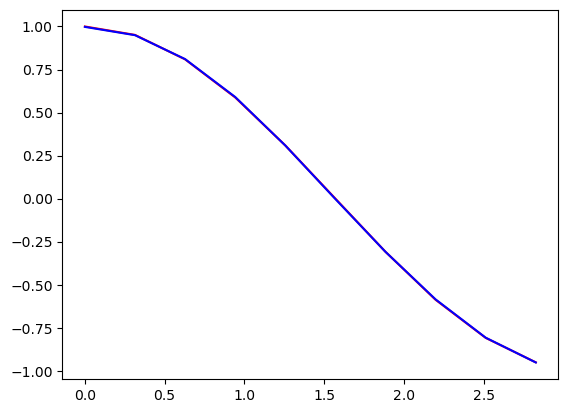

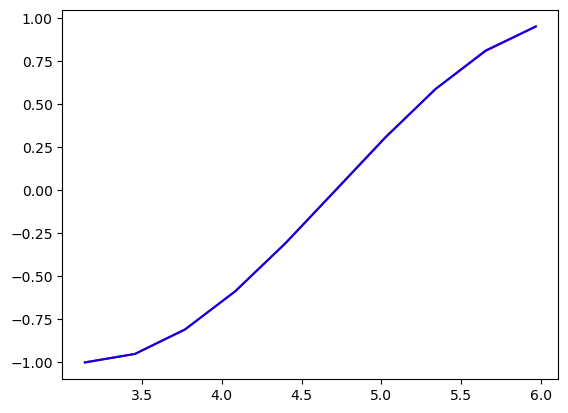

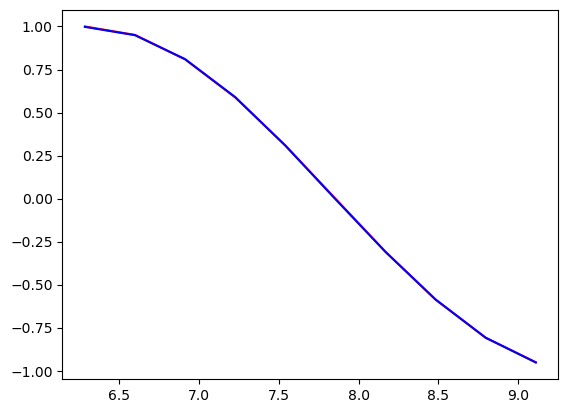

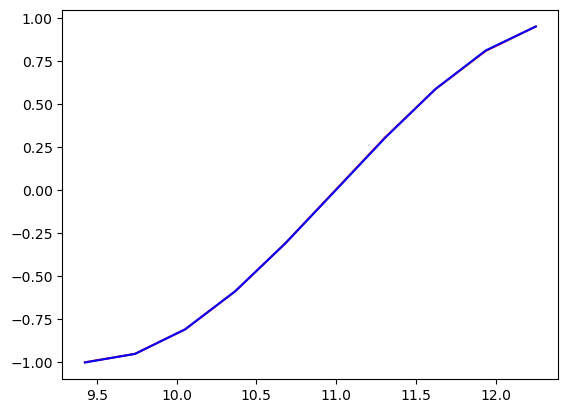

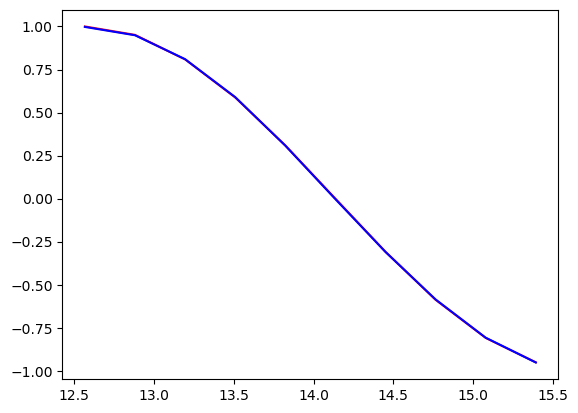

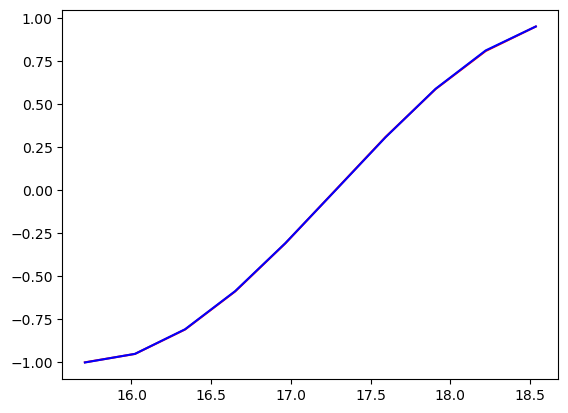

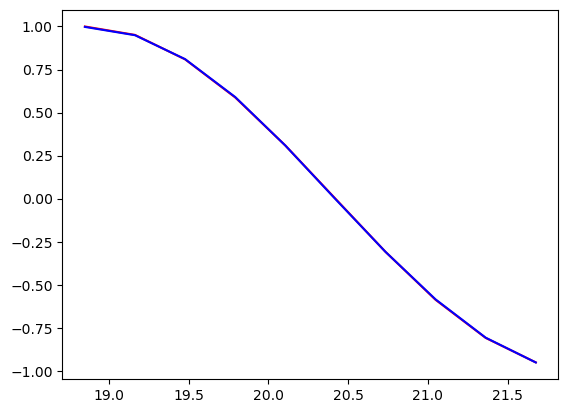

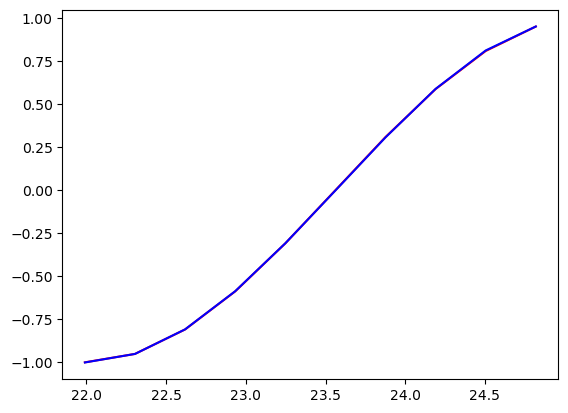

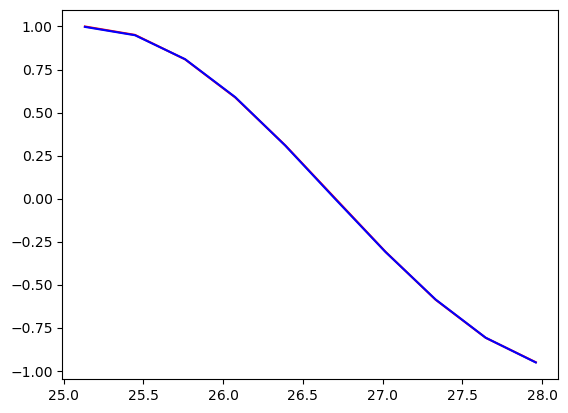

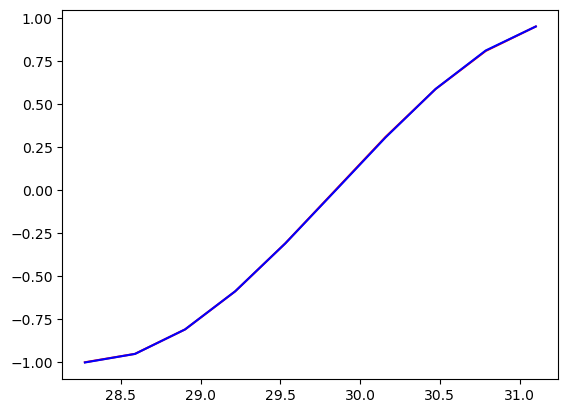

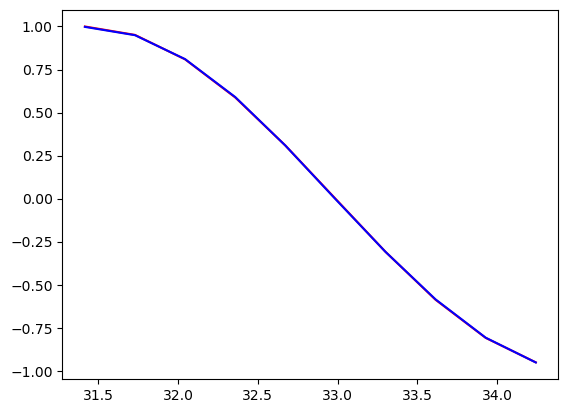

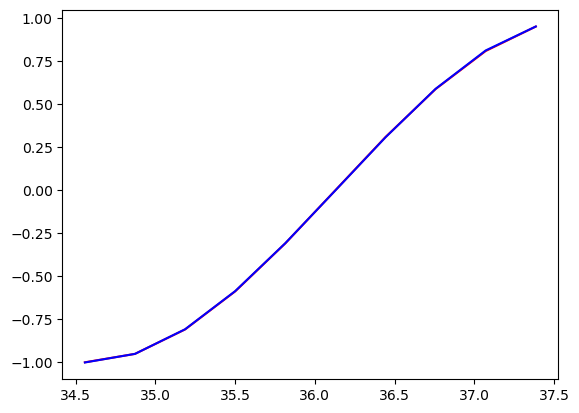

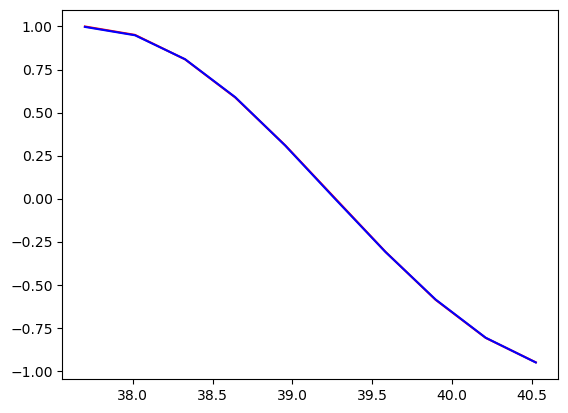

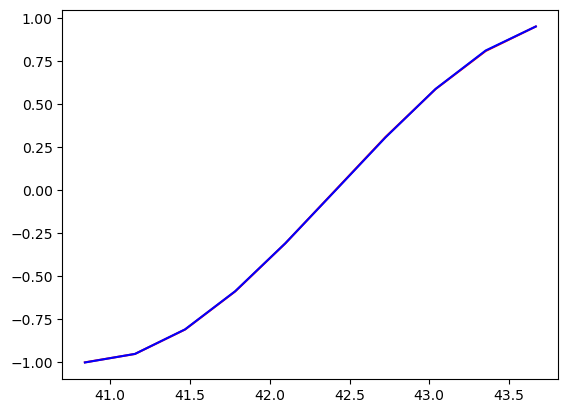

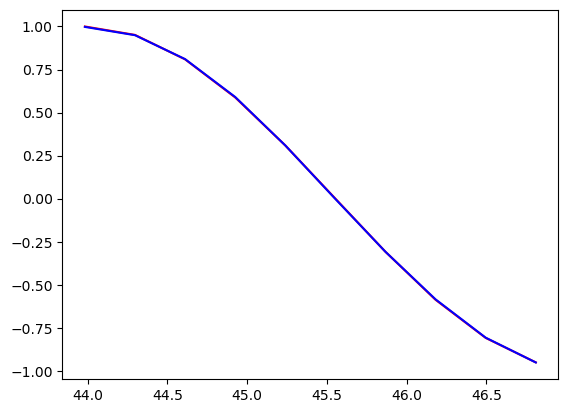

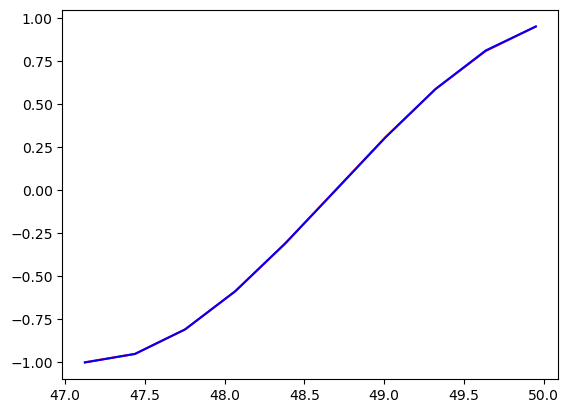

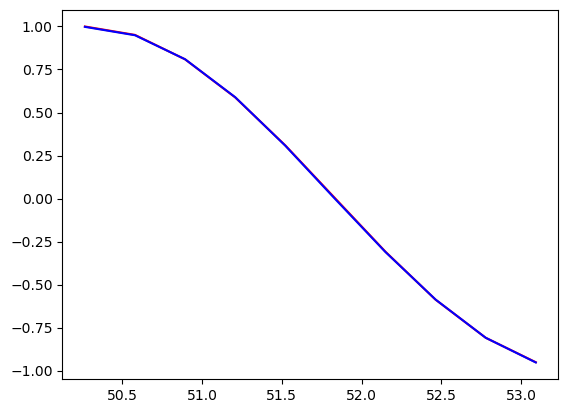

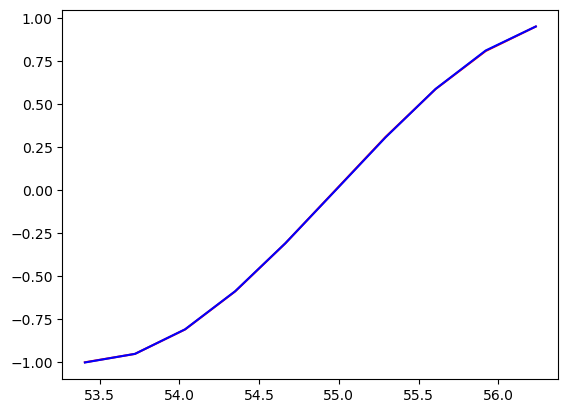

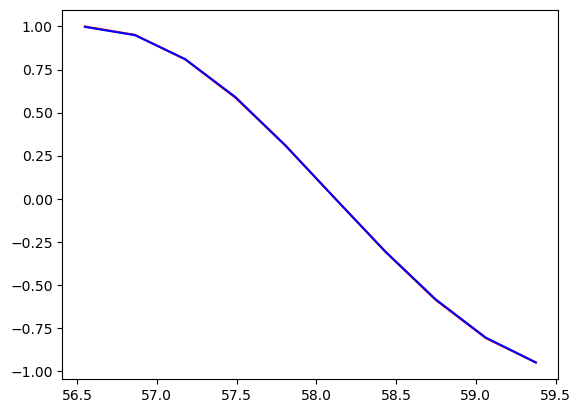

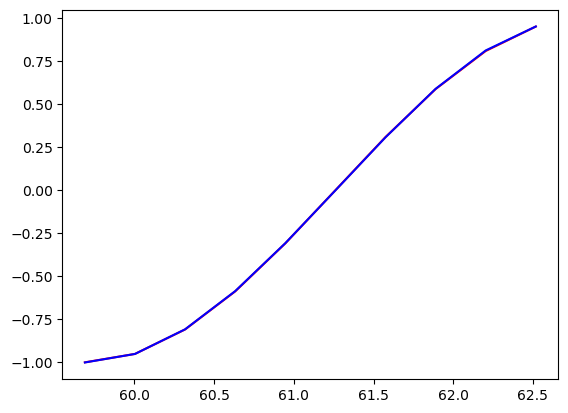

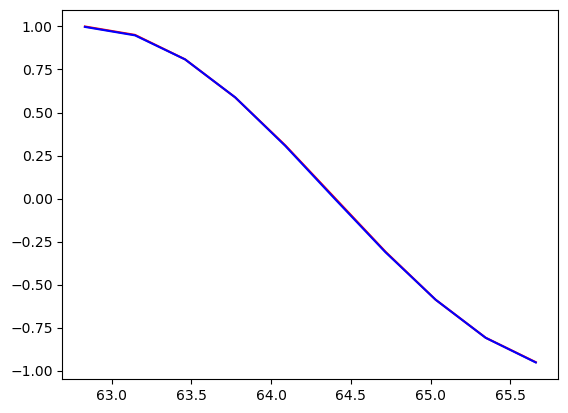

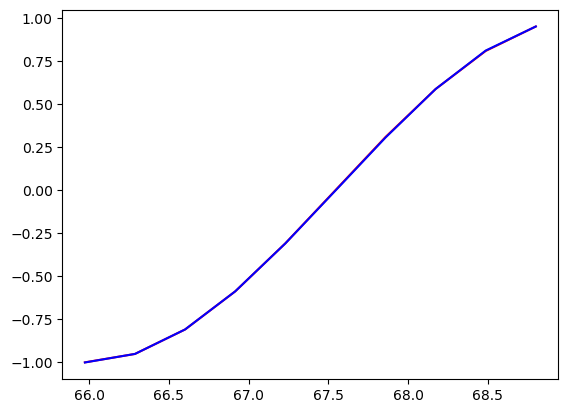

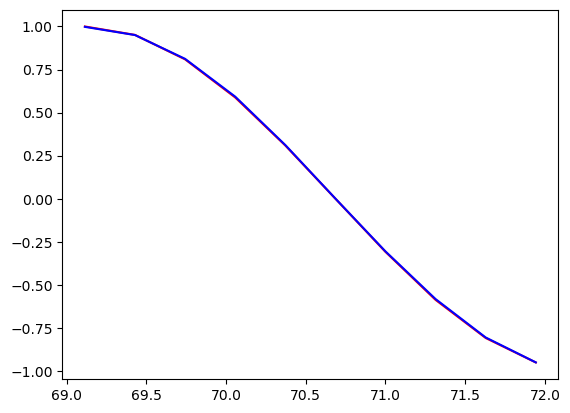

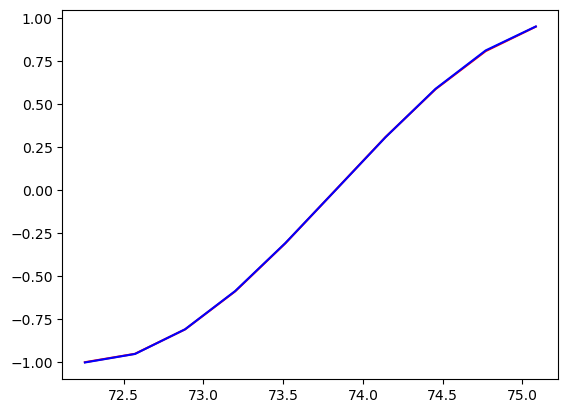

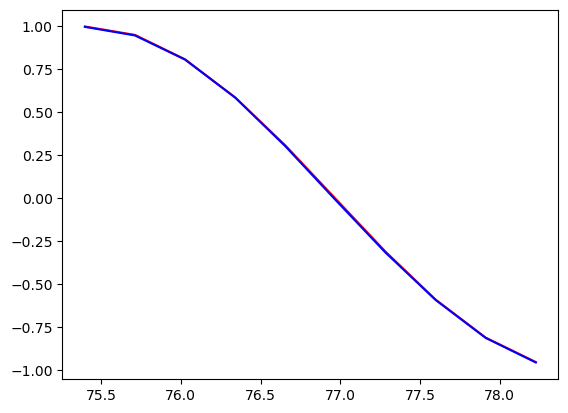

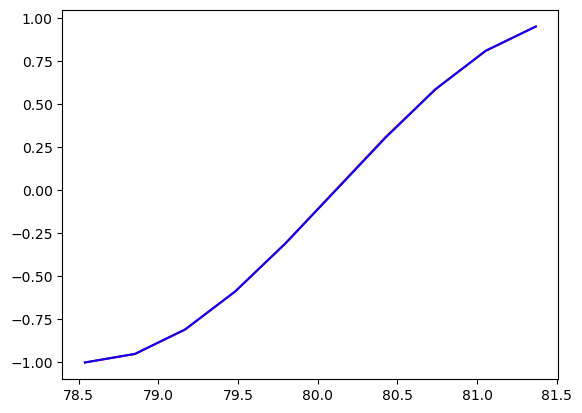

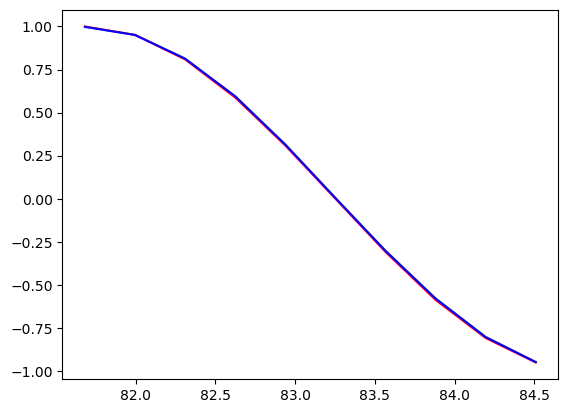

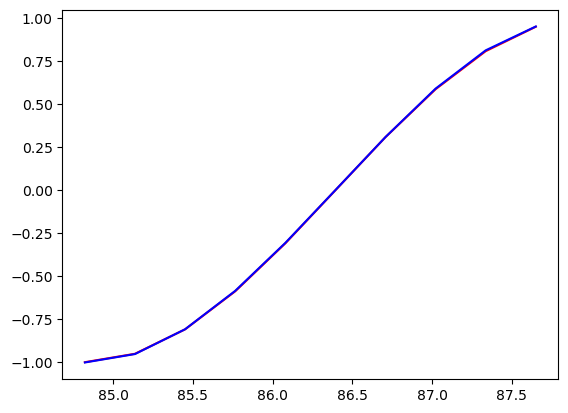

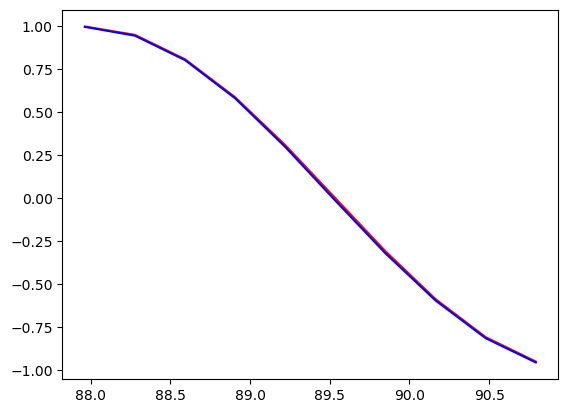

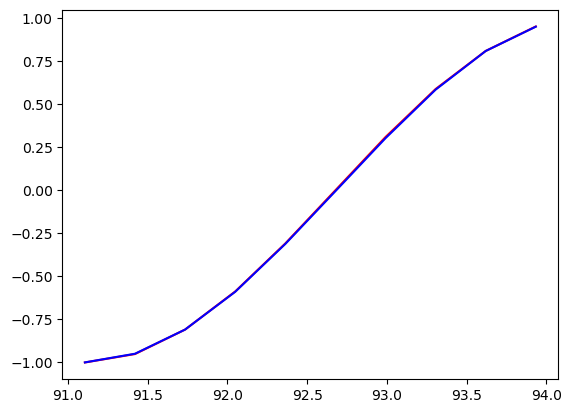

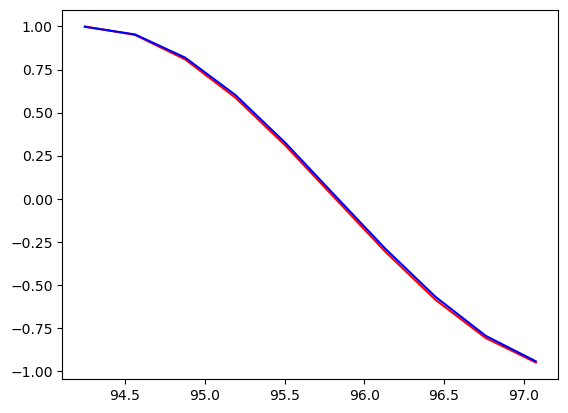

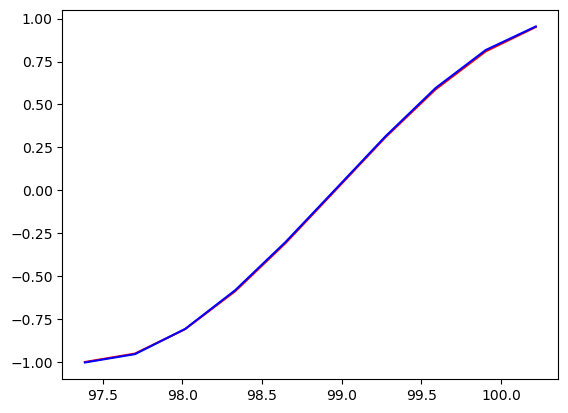

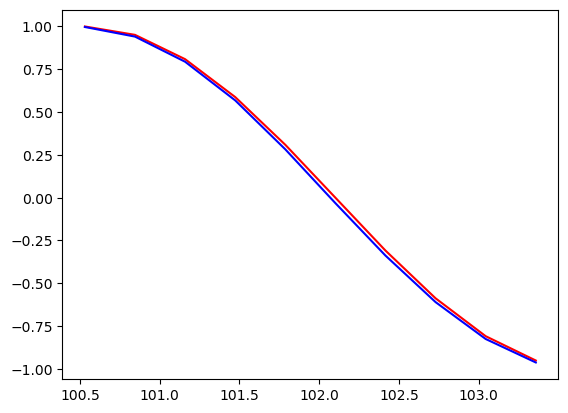

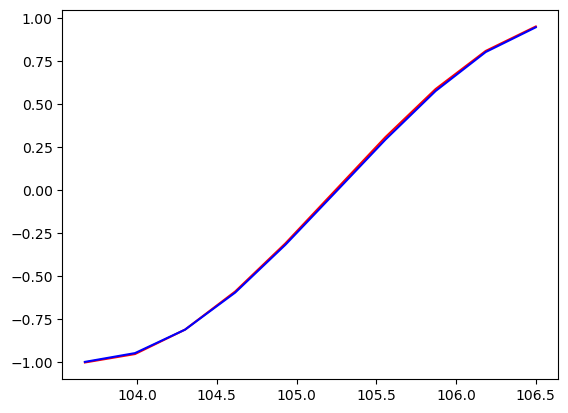

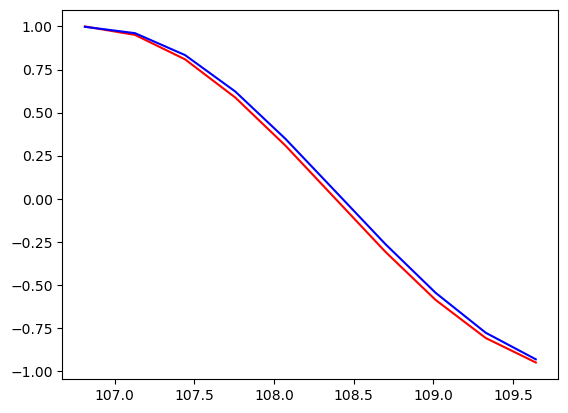

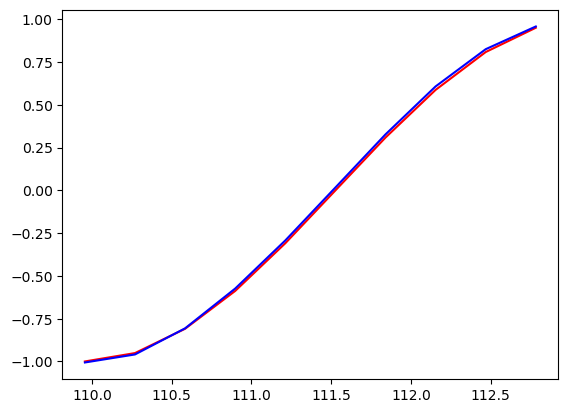

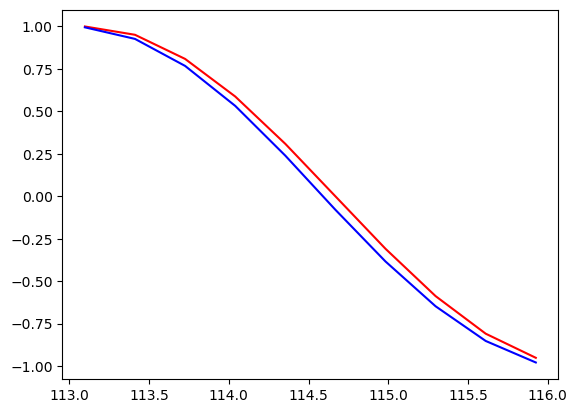

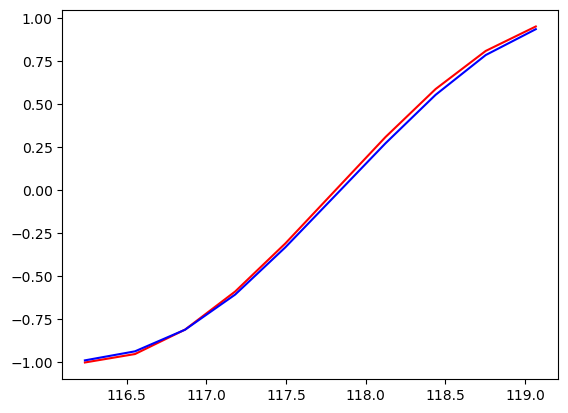

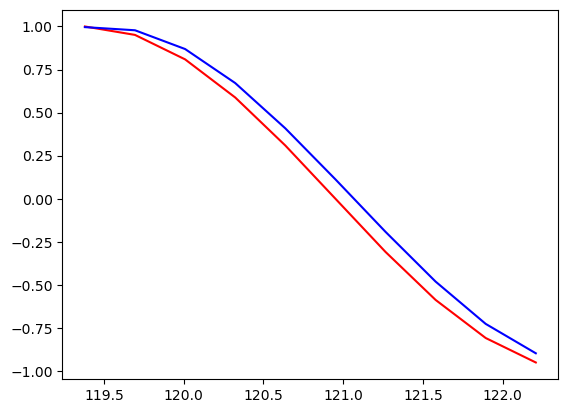

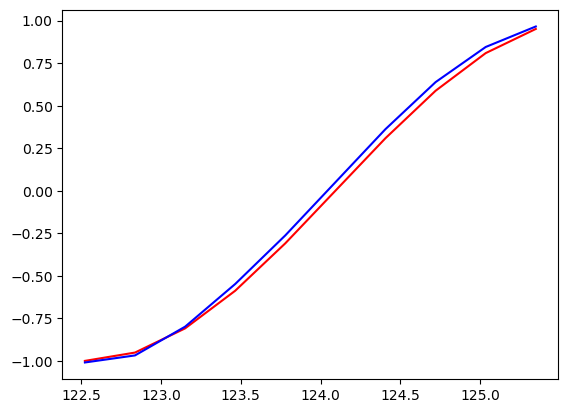

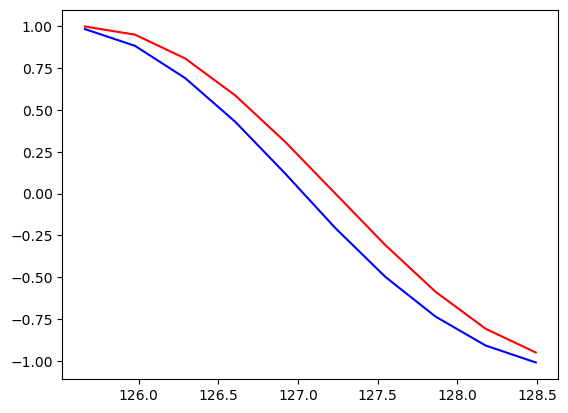

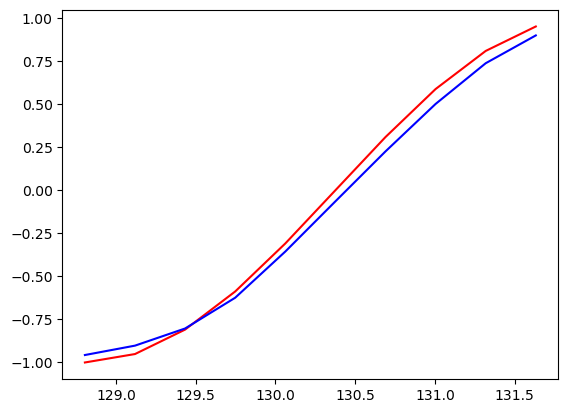

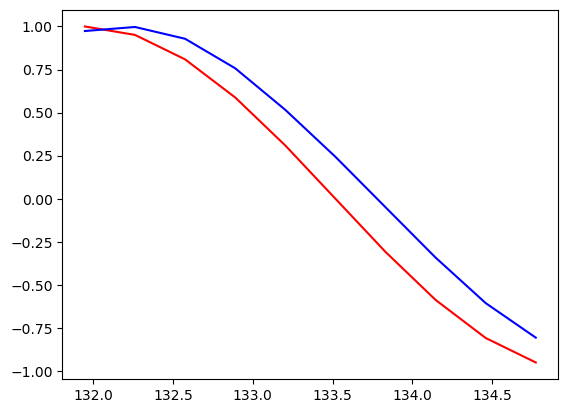

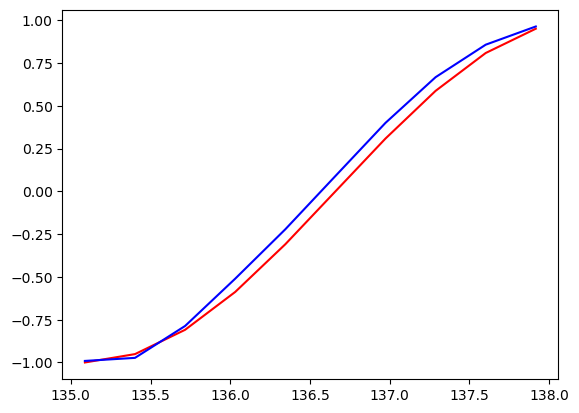

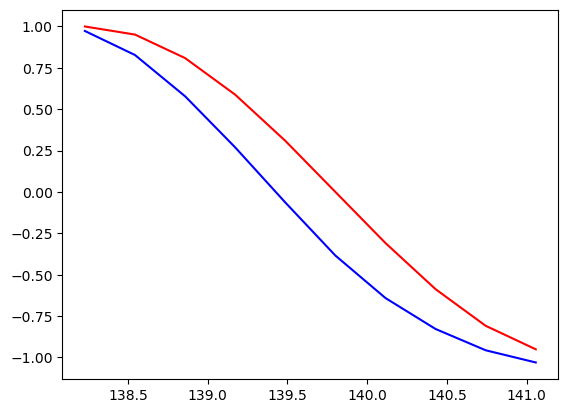

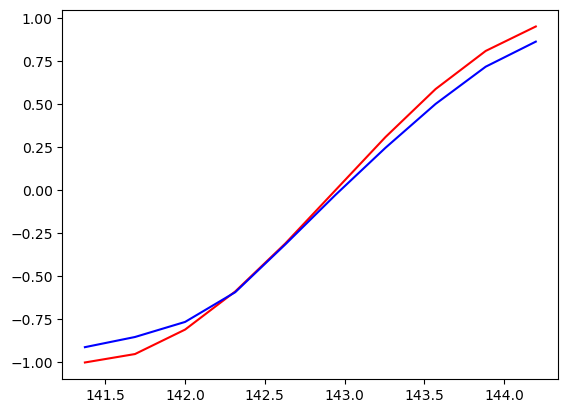

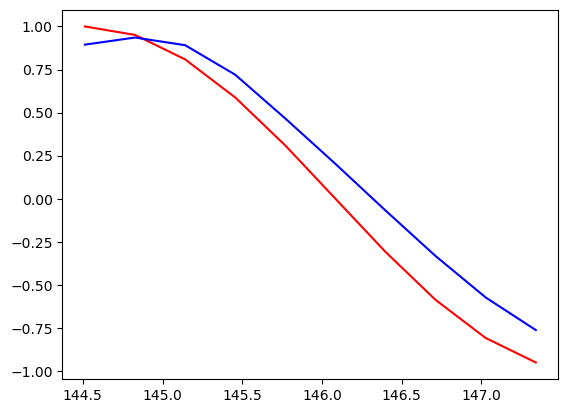

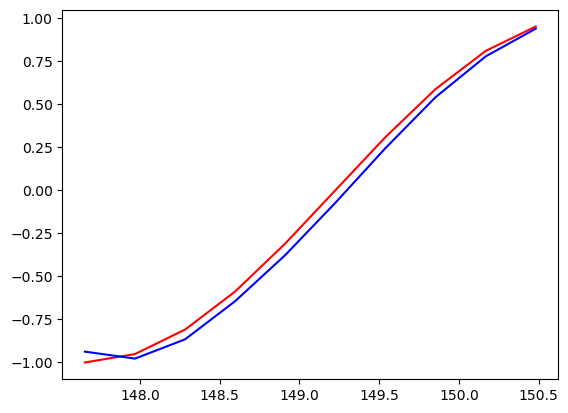

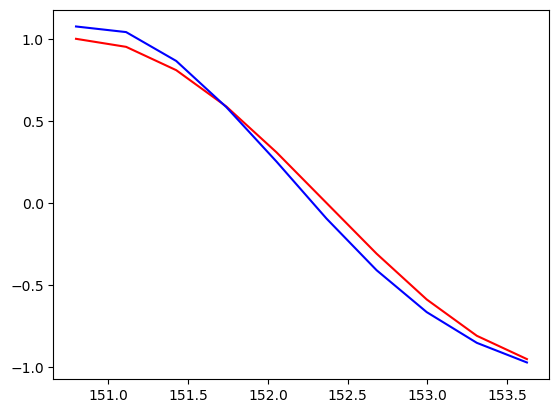

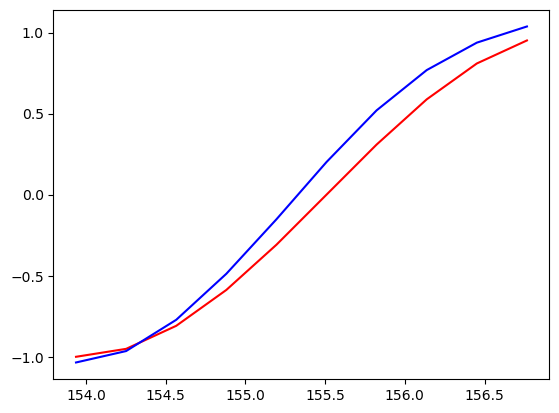

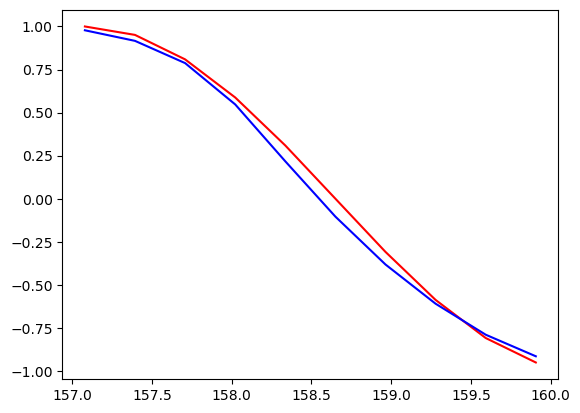

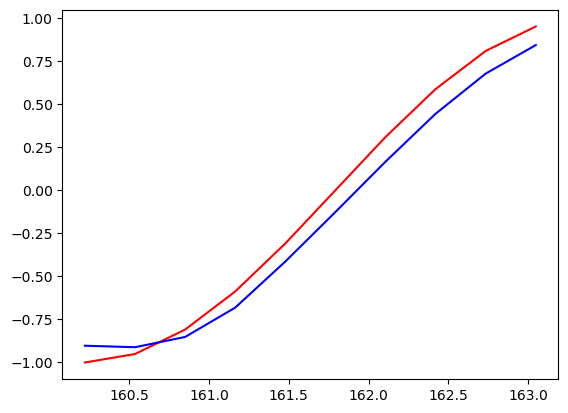

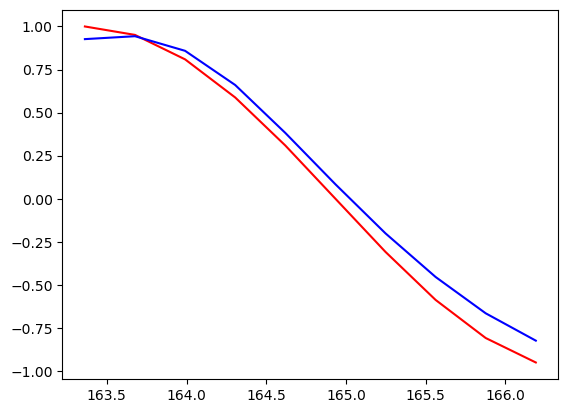

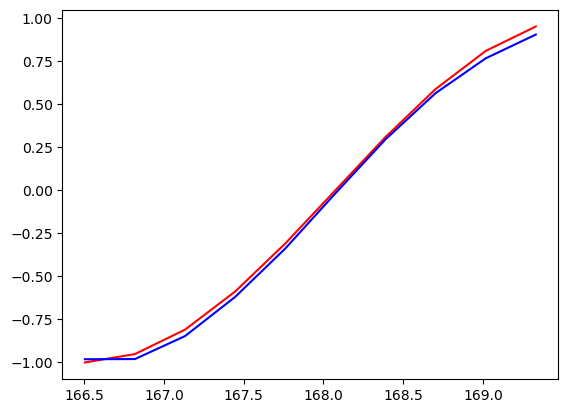

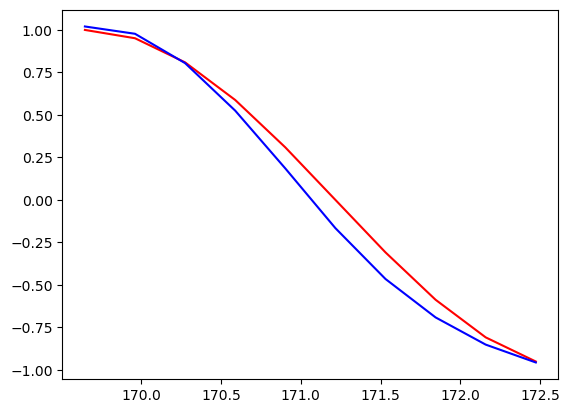

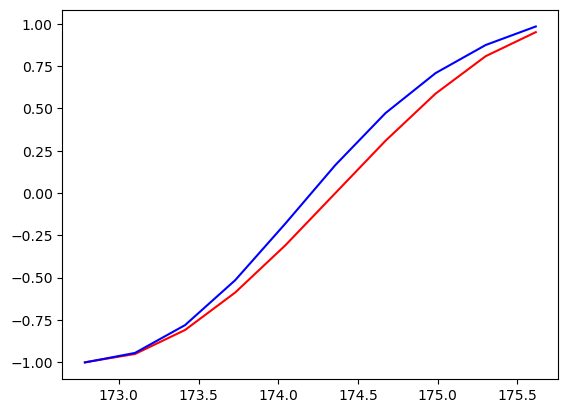

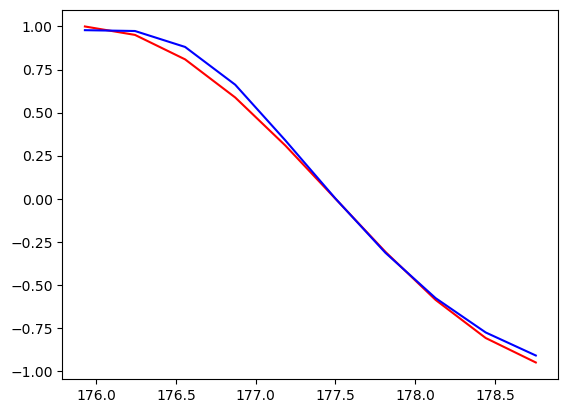

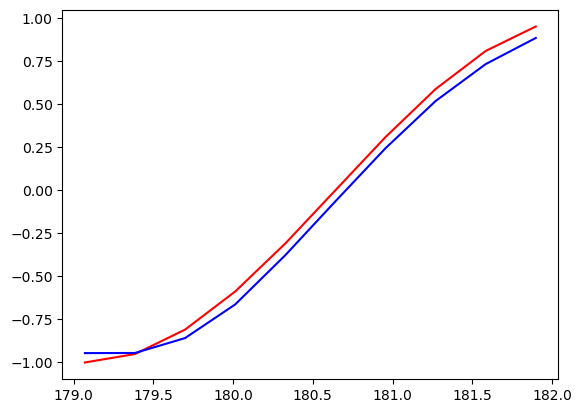

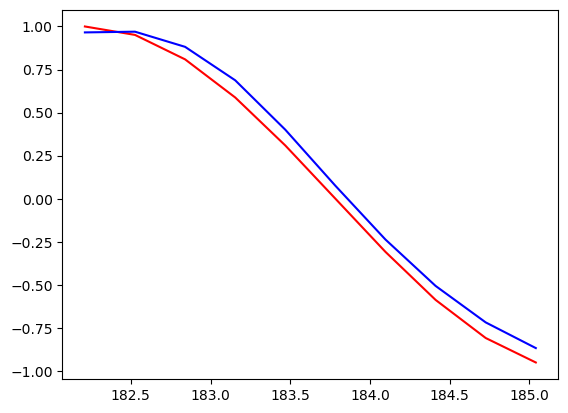

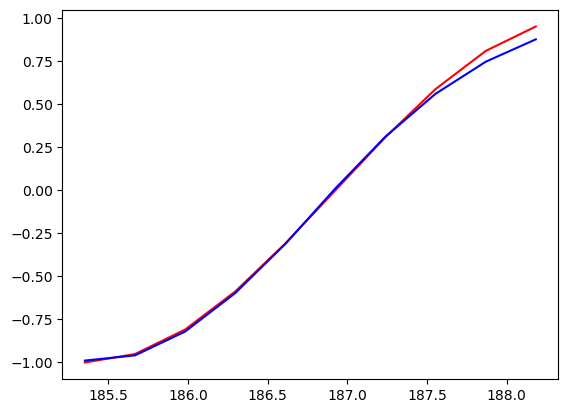

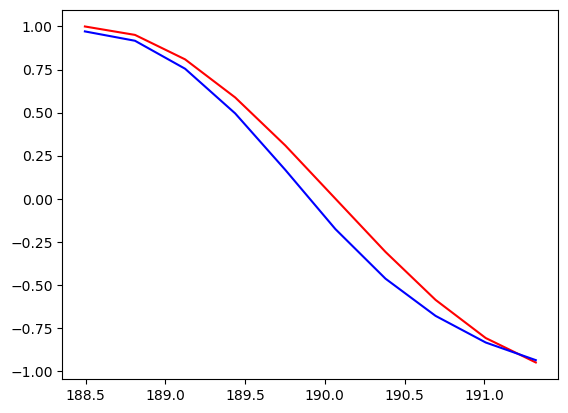

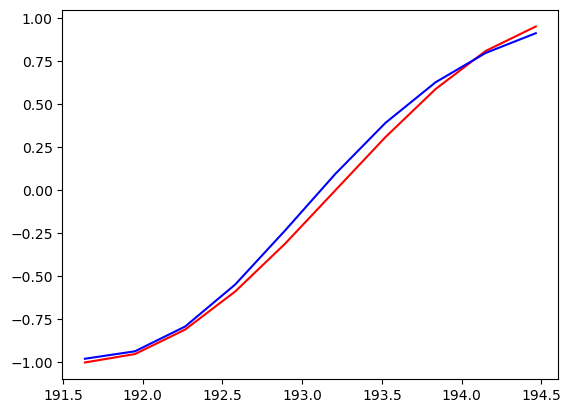

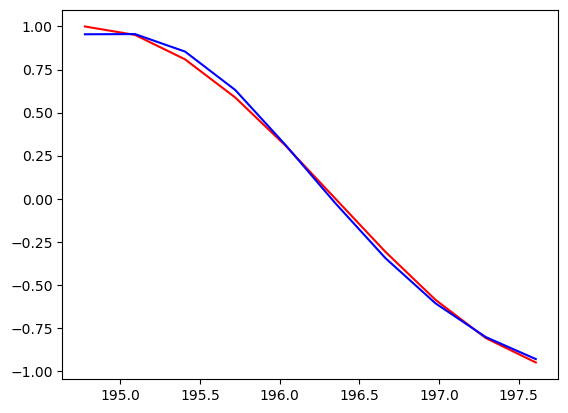

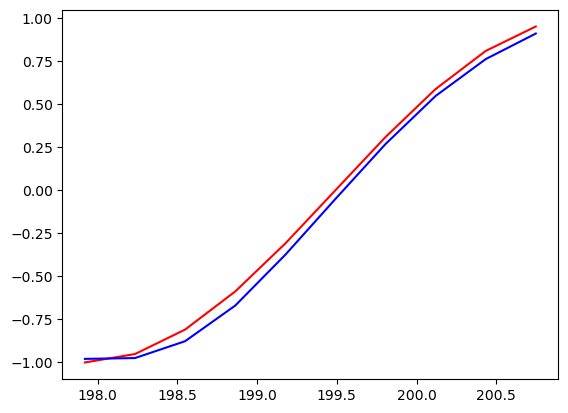

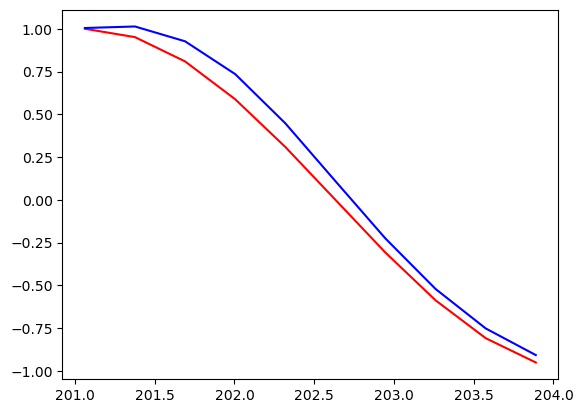

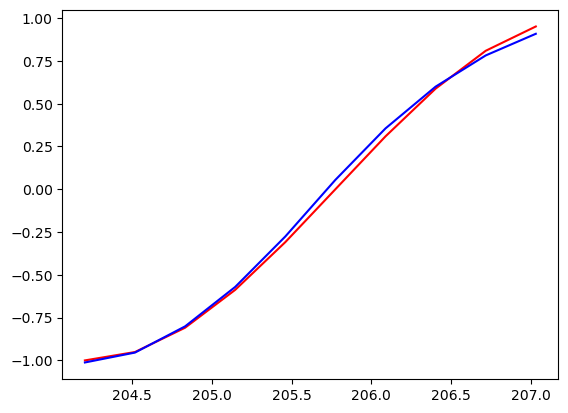

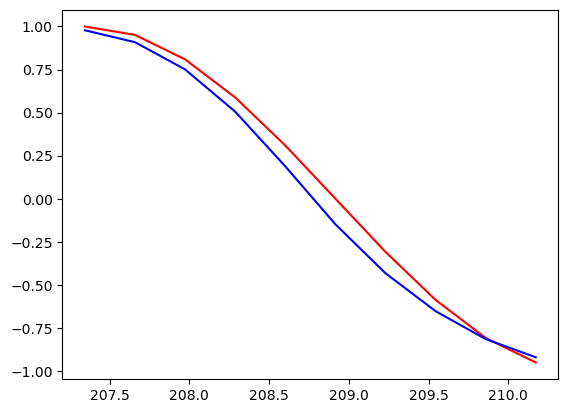

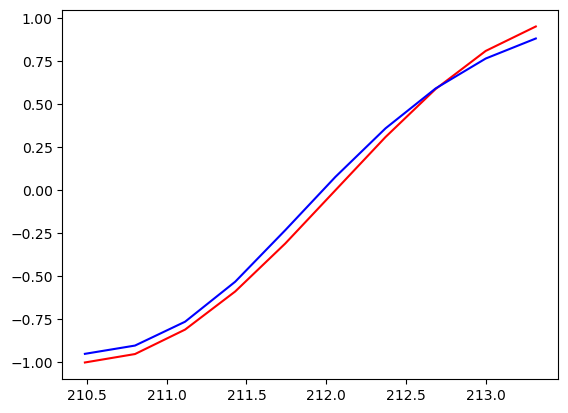

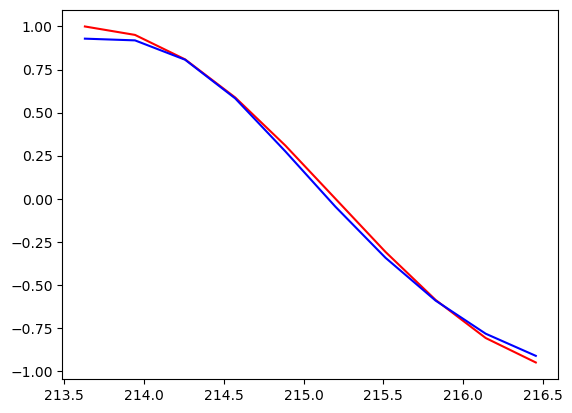

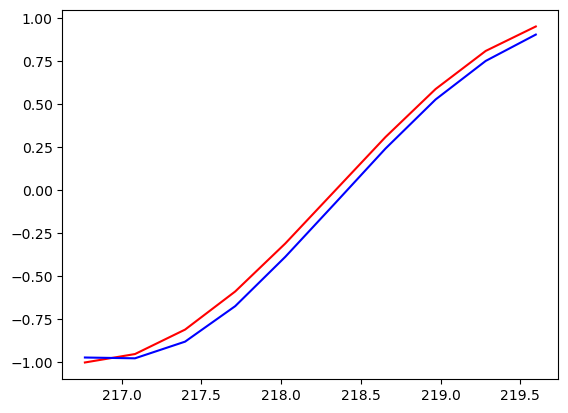

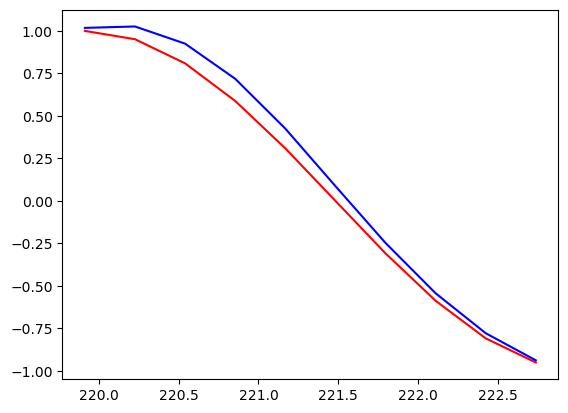

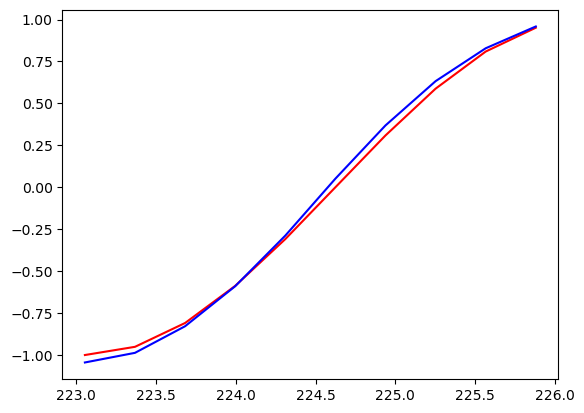

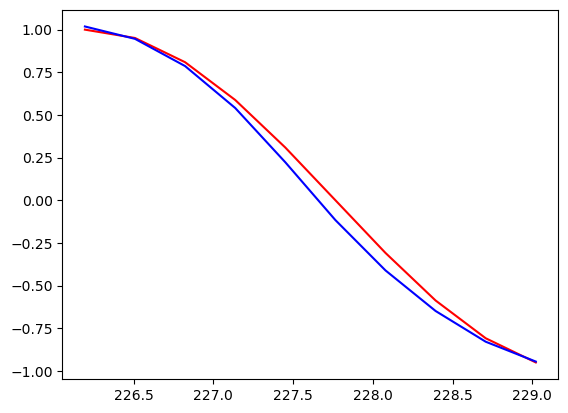

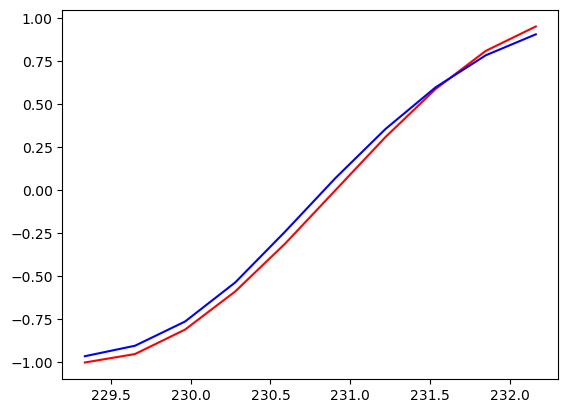

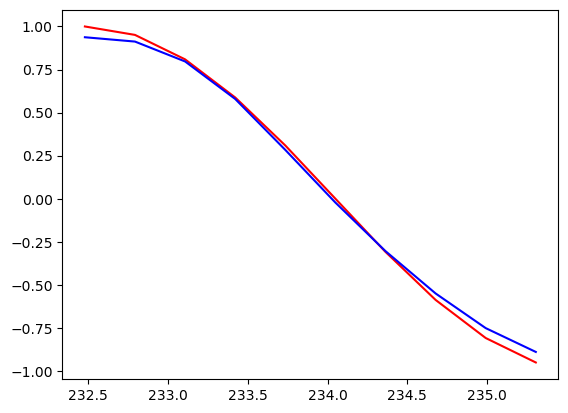

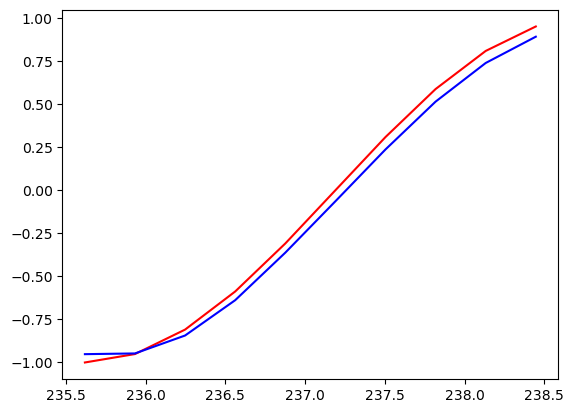

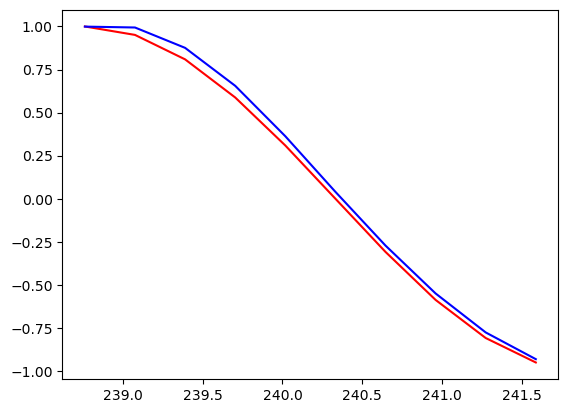

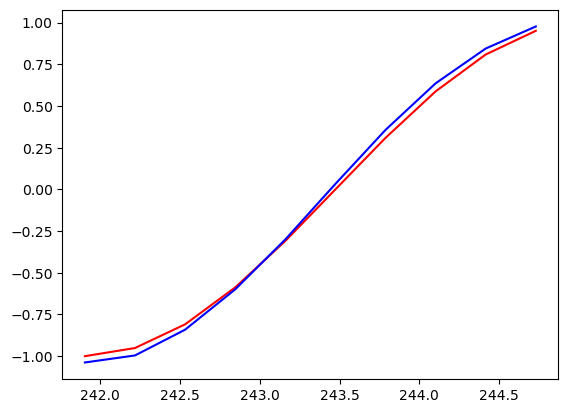

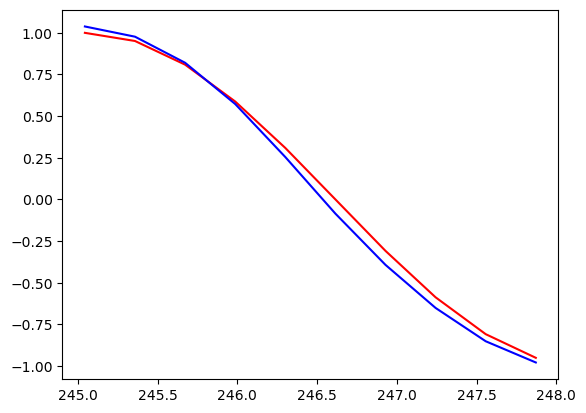

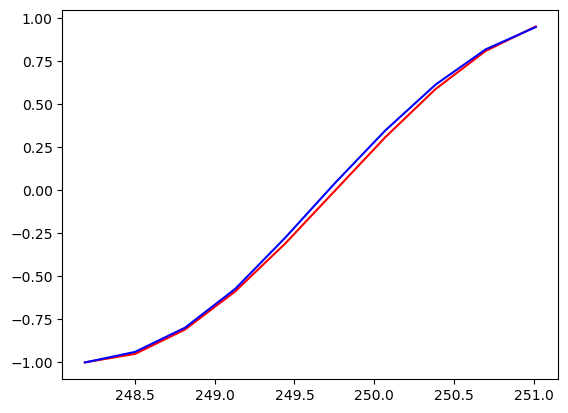

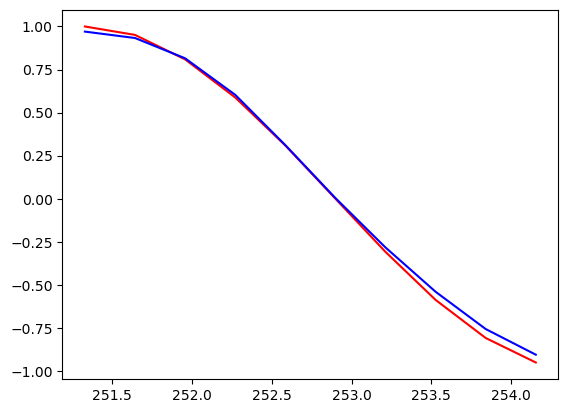

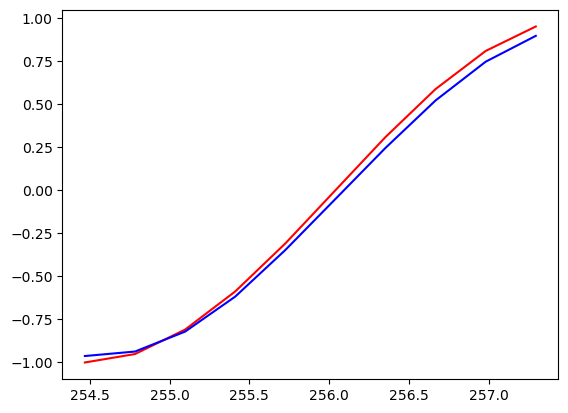

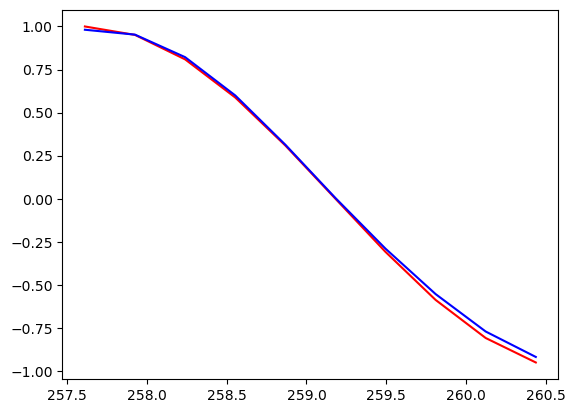

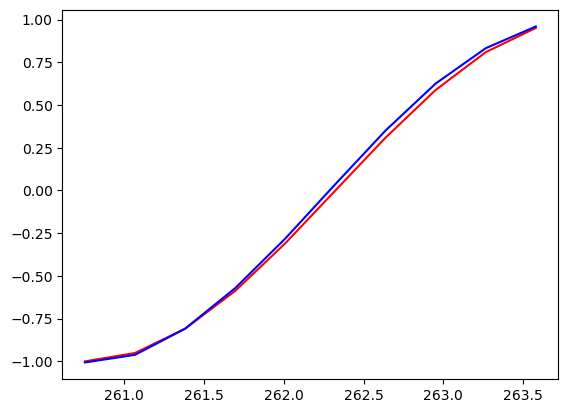

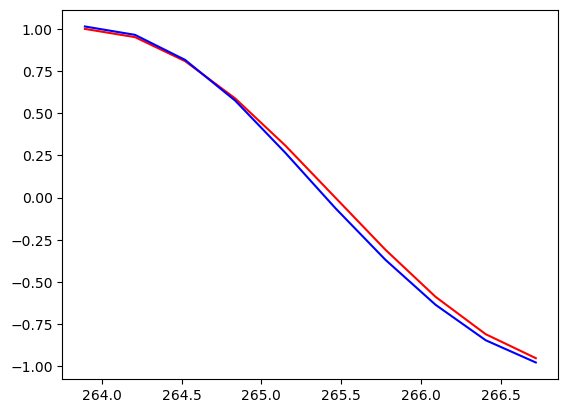

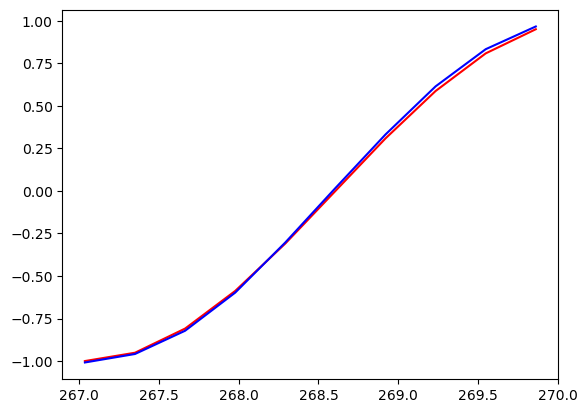

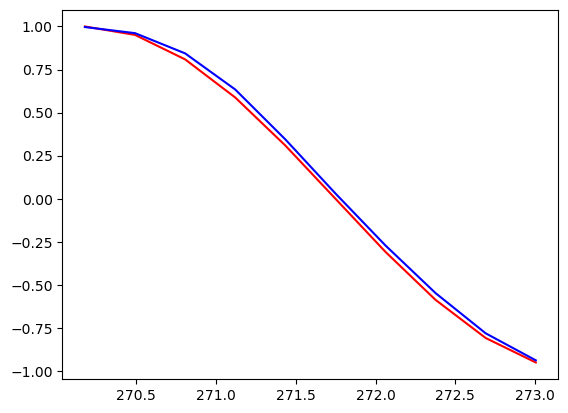

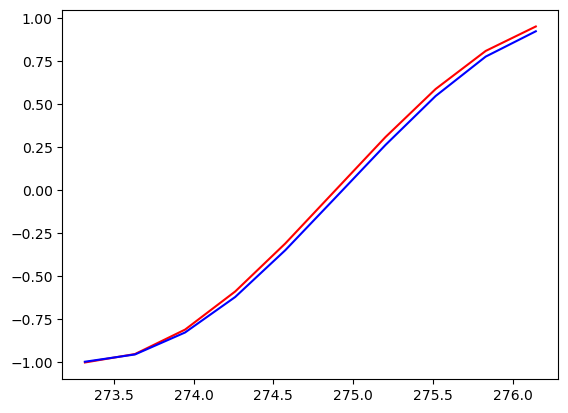

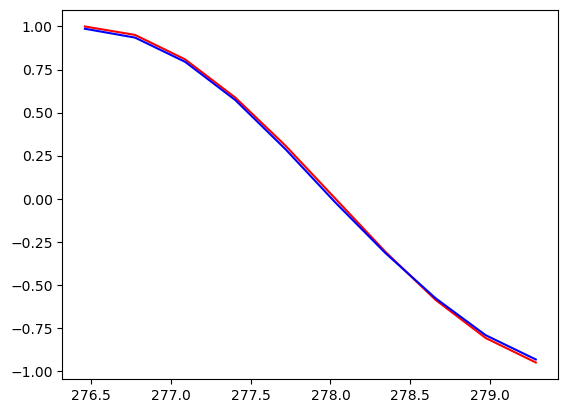

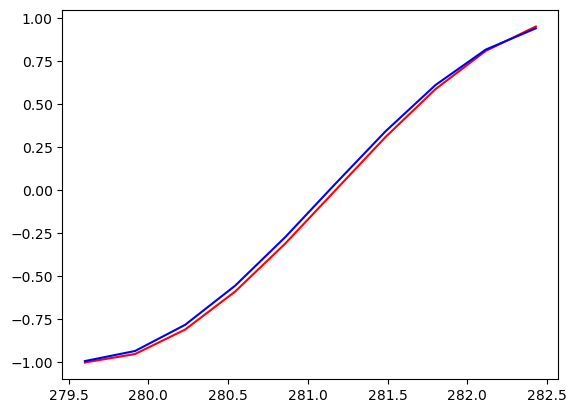

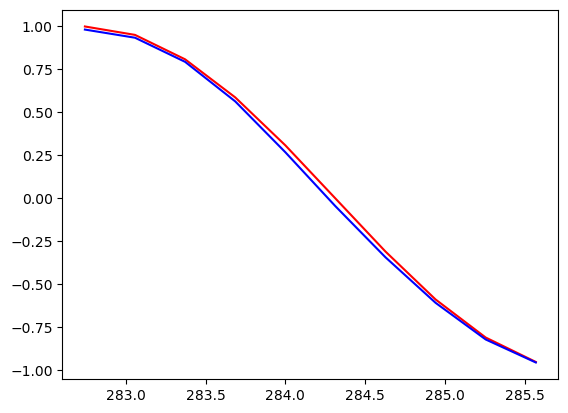

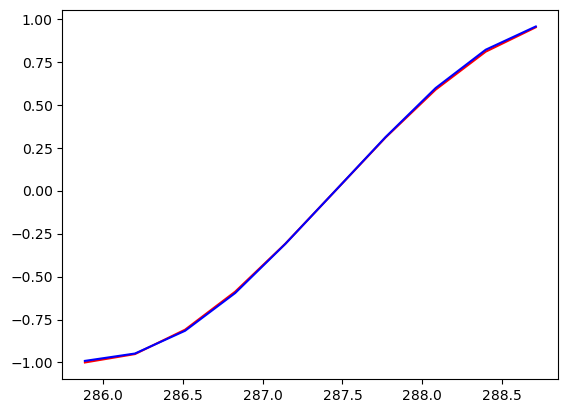

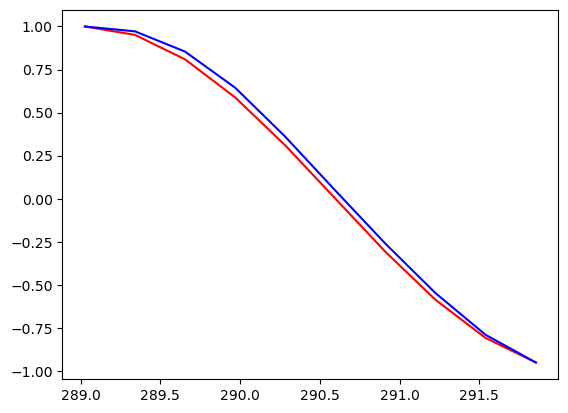

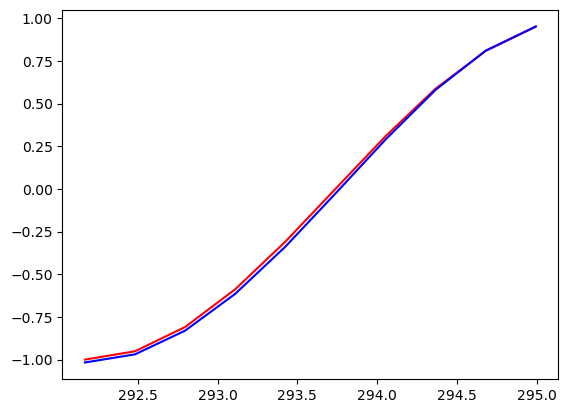

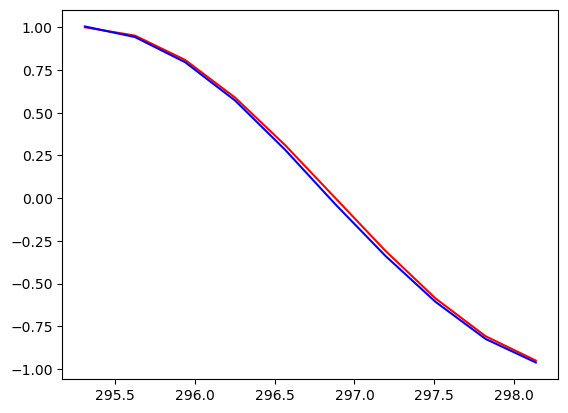

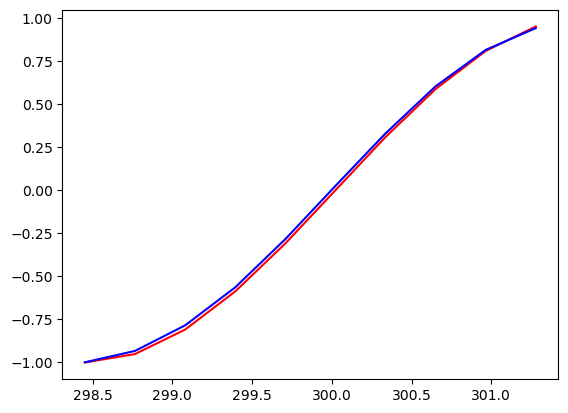

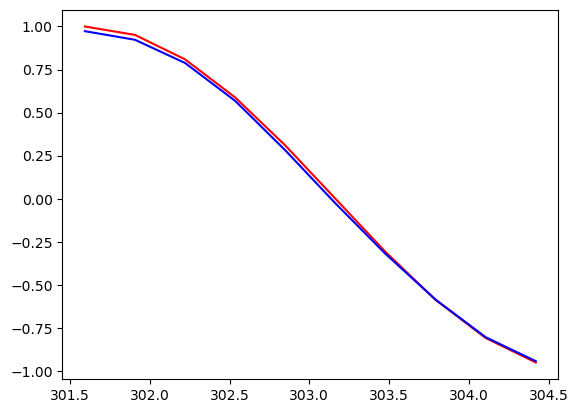

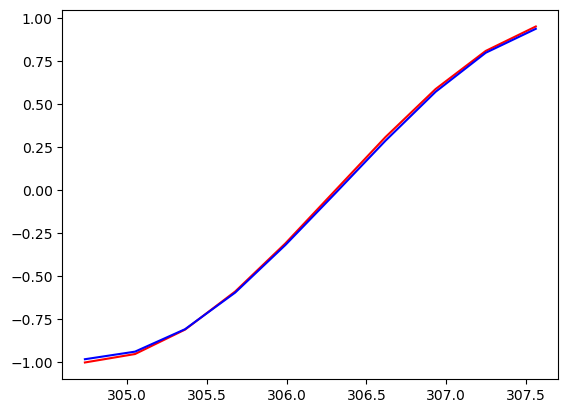

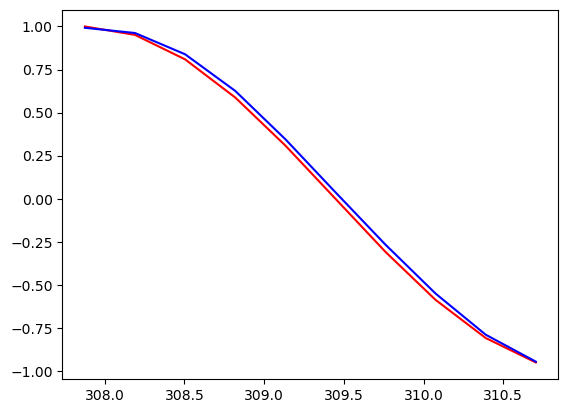

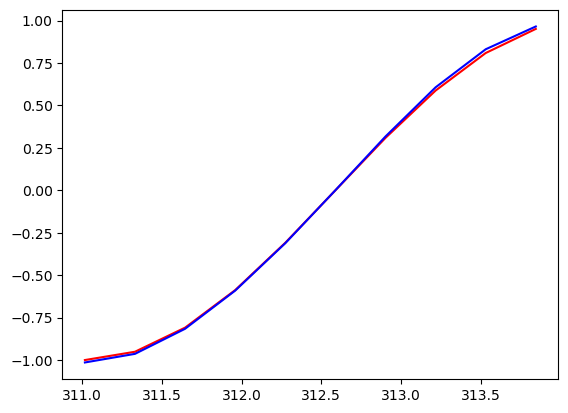

In [23]:
for step in range(100):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32, endpoint=False)  # float32 for converting torch FloatTensor
    x_np = np.sin(steps)
    y_np = np.cos(steps)

    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])

    prediction, h_state = rnn(x, h_state)   # rnn output
    # !! next step is important !!
    h_state = h_state.data        # repack the hidden state, break the connection from last iteration

    loss = loss_func(prediction, y)         # calculate loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients

    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)

plt.ioff()
plt.show()